In [56]:
import pandas as pd
import os
import sys
from selenium import webdriver as wd
import time
import selenium
from selenium.webdriver.common.by import By
from sqlalchemy import create_engine
import re
from datetime import datetime

In [57]:
site = "https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=%EC%B9%B4%EC%B9%B4%EC%98%A4%EB%B1%85%ED%81%AC%20%EC%9E%90%EC%9C%A0%EC%A0%81%EA%B8%88%20%EA%B0%80%EC%9E%85%20%ED%9B%84%EA%B8%B0"

# 백문백답 창

driver = wd.Chrome()
driver.get(site)

# 개인 블로그 창
driver_blog = wd.Chrome()

In [58]:
# 블로그 제목 순서 css  : 한페이지에 1~7
title_css = "#content > section > div.area_list_search > div:nth-child({}) > div > div.info_post > div.desc > a.desc_inner > strong"

# 페이지 
page_css = "#content > section > div.pagination > span:nth-child({}) > a"
next_page_css = "#content > section > div.pagination > a"

# 블로그 주소 알아오기
b_site_css = "#content > section > div.area_list_search > div:nth-child({}) > div > div.info_post > div.desc > a.desc_inner"

# 블로그 속 텍스트 css
text_css = ".se-main-container"


In [59]:
# 블로그 들어가기 
text_list = []
for i in range(1,8):
    b_site = driver.find_element(By.CSS_SELECTOR, b_site_css.format(i))
    driver_blog.get(b_site.get_attribute('href'))

    # 구조 변경 
    iframe = driver_blog.find_element(By.CSS_SELECTOR, '#mainFrame')
    driver_blog.switch_to.frame(iframe)

    # 블로그 속 텍스트 찾기 
    text_all = driver_blog.find_element(By.CSS_SELECTOR, text_css)

    #텍스트 저장
    text_list.append(text_all.text)

    time.sleep(1)

driver.close()

driver_blog.close()

In [60]:
text_list

['카카오뱅크 자유적금\n가입 후기, 추천, 정기예금 금리 비교\n개인적으로 카카오뱅크에서 제공하는 적금 상품에 대해 크게 메리트를 느끼지 못하는 편입니다.\n소비자의 이목을 집중시키기 위해 제공하는 금리 자체는 높지만, 우대금리 조건을 충족하기 어렵고, 실제 수령하는 이자도 생각보다 낮기 때문인데요.\n상품구조를 치밀하게 만들어 가입자의 우대금리 충족 확률을 낮추고, 소비자의 목돈을 카뱅에 묶어두게끔 만드는 경우가 대다수입니다.\n그러나 카카오뱅크의 금융상품 중에서도 가장 괜찮다고 보는 게 바로 자유적금입니다.\n물론 2금융권에 비하면 금리가 낮지만, 그럼에도 1금융권에서 안정적으로 목돈을 활용할 수 있기 때문인데요.\n저도 미래 대비를 위해 자유적금에 가입해 둔 계좌들이 있는데, 실제로도 활용을 할 예정입니다.\n그래서 이번 게시글에서는 카카오뱅크 자유적금 가입 후기, 정기예금과 금리비교, 그리고 추천 사유에 대해 정리해보려고 합니다.\n자유적금\n카카오뱅크 자유적금의 상품정보는 다음과 같습니다.\n가입대상 : 만 17세 이상의 실명의 개인\n계약기간 : 6개월 이상 36개월 이하(월, 일단위 설정 가능)\n월 납입한도 : 300만원\n기타정보 : 부분해지 2회 가능, 예금자보호 적용, 비과세종합저축 가능\n해당 자유적금은 가입기간 설정이 자유롭고, 월 납입한도도 넉넉하며, 부분해지(중도인출)도 2회까지 가능해 활용도가 높습니다.\n카카오뱅크도 엄연히 은행권이기 때문에 예금자보호가 적용됩니다.\n또한, 비과세종합저축으로 가입이 가능하기 때문에 이자소득세를 절세하려는 분은 고려해보시면 좋습니다.\n이자소득세율, 금융소득 2000만원, 세금우대 비과세 예금 적금 방법\n이자소득세율 개인적으로 작년부터 시작된 고금리 장기화로 인해 예금과 적금에 본격적인 관심을 갖게 됐습...\nblog.naver.com\n현재 카카오뱅크 자유적금 금리는 최대 4.2%입니다.\n가입기간 별 기본금리는 6~12개월은 3.7%이며, 12~36개월 4.0%입니다.\n여기에 우대금리 0

In [98]:
stopwords = ['자유','적금','카카오','뱅크','만원','수']

# 텍스트 데이터 가져오기
texts = text_list

In [99]:
mecab = Mecab()

tokenized_texts = []

for text in texts:
    nouns = [noun for noun in mecab.nouns(text) if noun not in stopwords]
    tokenized_texts.append(' '.join(nouns))

In [100]:
tokenized_texts

['가입 후기 추천 정기예금 금리 비교 개인 제공 상품 메리트 편 소비자 이목 집중 제공 금리 자체 우대금리 조건 충족 실제 수령 이자 생각 때문 상품 구조 가입자 우대 금리 충족 확률 소비자 목돈 뱅 경우 대다수 금융 상품 중 게 금융 금리 금융 안정 목돈 활용 때문 저 미래 대비 가입 계좌 활용 예정 이번 게시 글 가입 후기 정기예금 금리 비교 추천 사유 정리 상품 정보 다음 가입 대상 만 세 이상 실명 개인 계약 기간 개월 이상 개월 이하 월 위 설정 가능 월 납입 한도 만 원 기타 정보 부분 회 가능 예금자 보호 적용 과세 종합 저축 가능 해당 가입 기간 설정 월 납입 한도 부분 중도 인출 회 가능 활용 은행 때문 예금자 보호 적용 과세 종합 저축 가입 가능 때문 이자 소득세 절세 분 고려 이자 소득세 금융 소득 만 원 세금 우대 과세 예금 방법 소득세 개인 작년 시작 고금리 장기 예금 본격 관심 금리 최대 가입 기간 기본 금리 개월 개월 여기 우대금리 추가 적용 계약 월수 중 이상 해당 개월 동안 자동 이체 금액 납입 만기 해지 경우 적용 때 자동 이체 납입 금액 최소 원 설정 가능 해당 금액 이자 돈 얼마 납입 산출 예 가입 기간 개월 금리 가입 만 원 첫날 입금 만 원 세전 만 원 발생 가입 후 개월 후 만 원 추가 입금 세전 만 원 추가 후기 저 년 월 일 가입 가입 기간 개월 만기 년 월 일 적용 금리 기본 우대 우대금리 천 원 자동 이체 설정 저 개 계좌 개설 이유 만기 전 해당 정기예금 단기 파킹 통장 활용 위 설명 계산 방식 생각 내 납입 시점 이자 산출 만기 개월 전 해당 계좌 돈 납입 개월 예금 이자 수령 향후 정기예금 금리 것 대비 개설 것 금리 만기 개월 전 즈음 금리 것 예상 향후 개월 정기예금 파킹 통장 대용 활용 예정 이 후기 계좌 개 이유 월 납입 한도 백만 원 때문 한도액 인 최대 개 개설 금액 가능 정기예금 금리 비교 정기예금 최대 금리 가입 기간 설정 상품 여기 금리 가입 기간 개월 이상 경우 적용 실제 가입 기간 금리

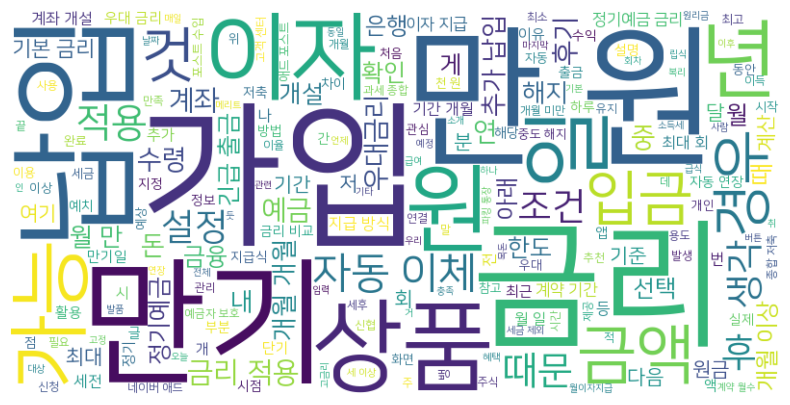

In [101]:
import wordcloud
import matplotlib.pyplot as plt

plt.rc('font', family='NanumSquareR')

combined_text = " ".join(tokenized_texts)

# WordCloud 생성
wordcloud = wordcloud.WordCloud(font_path = 'C:/Users/NT551XCJ/Desktop/py_projects/blog크롤링/NanumSquareR.ttf',width=800, height=400, background_color ='white').generate(combined_text)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(tokenized_texts)

In [38]:
df = pd.DataFrame(tf_idf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [39]:
df

,가능,가입,가입자,가지,각종,감안,개꿀,개념,개설,개요,...,확률,확보,확인,환금성,활용,회차,횟수,효과,후기,휴대폰
0,0.083091,0.201793,0.023513,0.000000,0.000000,0.000000,0.000000,0.000000,0.067276,0.000000,...,0.028326,0.000000,0.000000,0.000000,0.100490,0.000000,0.000000,0.000000,0.067276,0.000000
1,0.025084,0.075253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170604,0.000000,...,0.000000,0.000000,0.110623,0.000000,0.042472,0.000000,0.000000,0.000000,0.085302,0.000000
2,0.028588,0.343055,0.000000,0.000000,0.068219,0.000000,0.000000,0.000000,0.064811,0.000000,...,0.000000,0.000000,0.210122,0.000000,0.000000,0.000000,0.000000,0.000000,0.064811,0.000000
3,0.075818,0.132682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037546,0.000000,0.000000,0.045231
4,0.082828,0.144949,0.041017,0.000000,0.000000,0.049413,0.000000,0.041017,0.023472,0.000000,...,0.000000,0.000000,0.060879,0.049413,0.035060,0.082034,0.000000,0.000000,0.023472,0.000000
5,0.062369,0.137211,0.000000,0.059532,0.000000,0.000000,0.059532,0.024708,0.014139,0.000000,...,0.000000,0.029766,0.018336,0.000000,0.000000,0.024708,0.000000,0.059532,0.014139,0.000000
6,0.091217,0.072973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082718,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036137,0.000000,0.103397,0.000000
